In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.shape

(53940, 10)

In [5]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [6]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [7]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isnull().sum()/len(df)*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [11]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64

In [12]:
df.duplicated().sum()

146

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

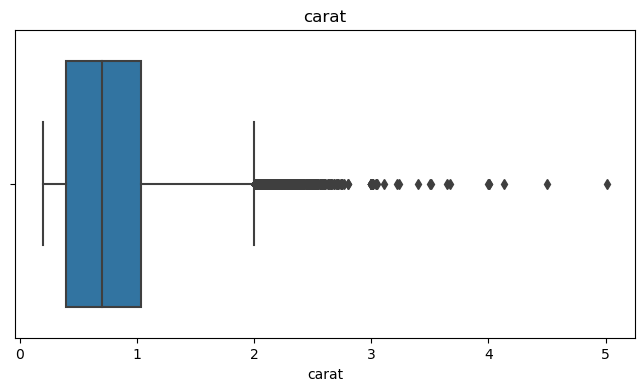

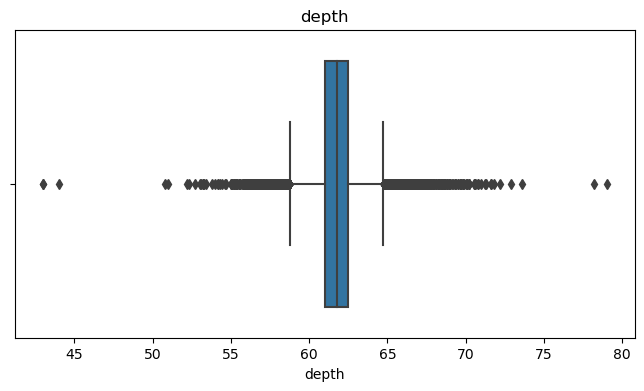

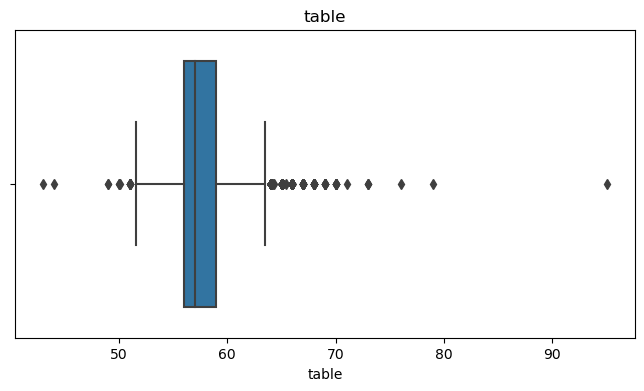

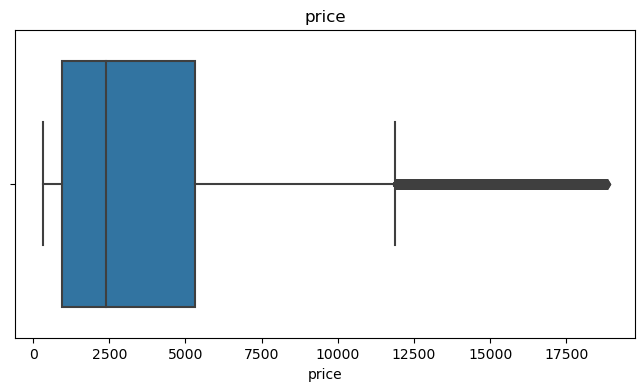

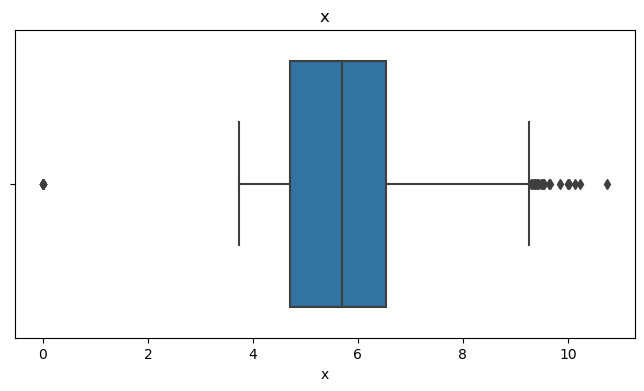

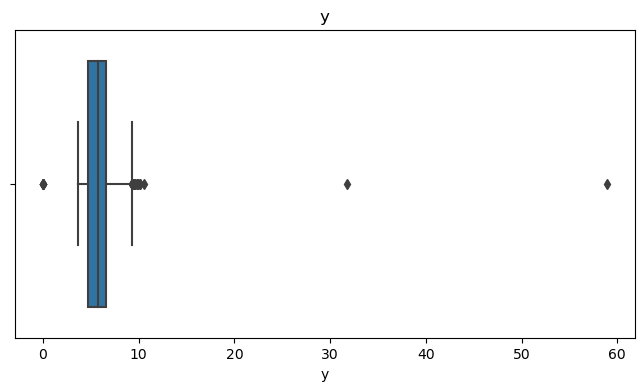

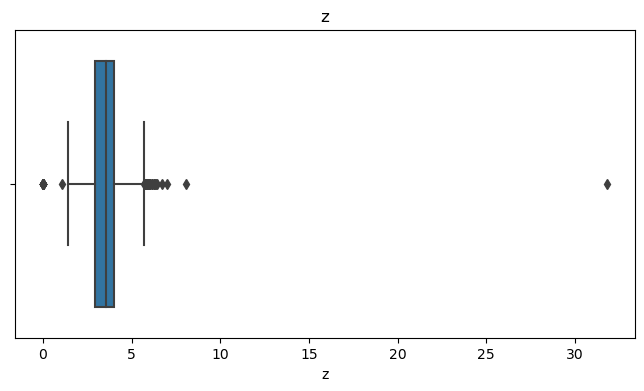

In [15]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.show()

In [16]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1

#Define outliers boun
ll = q1 - 1.5 * iqr                   #lower_bound
ul = q3 + 1.5 * iqr                   #upper_bound


#Remove outliers
df_no_outliers = df[(df['carat'] >= ll) & (df['carat'] <= ul)]

print(df_no_outliers)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[51921 rows x 10 columns]


In [17]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr  # Lower bound
upper_bound = q3 + 1.5 * iqr  # Upper bound

# Remove outliers: keep rows where 'carat' is between lower_bound and upper_bound
df_no_outliers = df[(df['carat'] >= lower_bound) & (df['carat'] <= upper_bound)]

# Print the cleaned DataFrame (or a preview of it)
print(df_no_outliers.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [18]:
df['carat'].max()

5.01

In [19]:
df_no_outliers['carat'].max()

2.0

<Axes: xlabel='carat'>

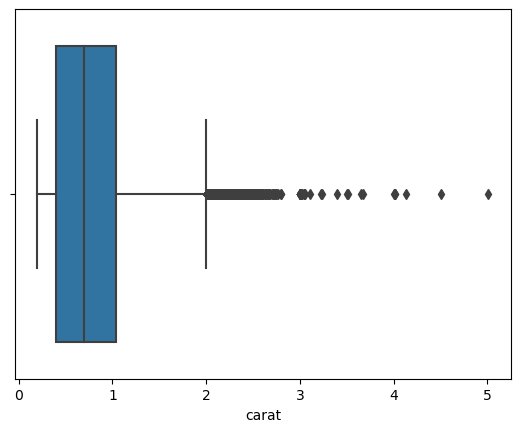

In [20]:
sns.boxplot(data=df,x='carat')

<Axes: xlabel='carat'>

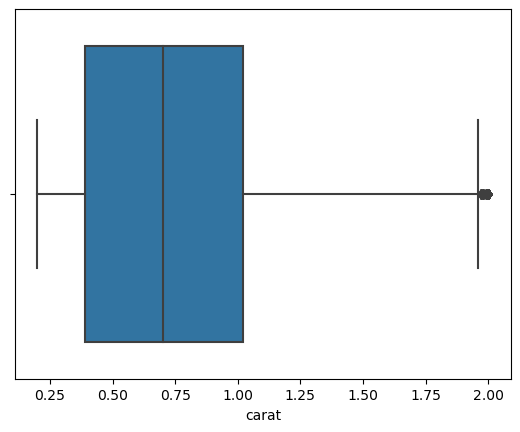

In [21]:
sns.boxplot(data=df_no_outliers,x='carat')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


mask = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)


df_no_outliers = df[mask]

print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Original shape: (53794, 10)
Shape after removing outliers: (47416, 10)


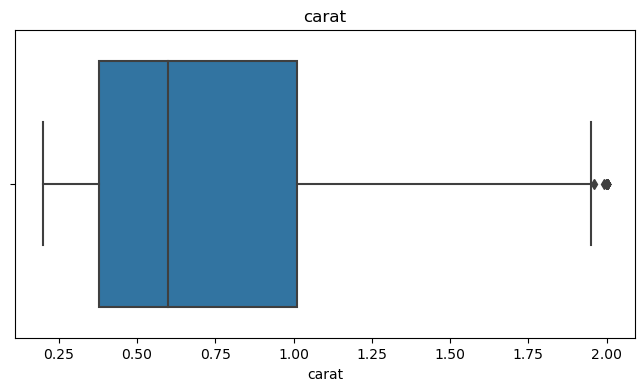

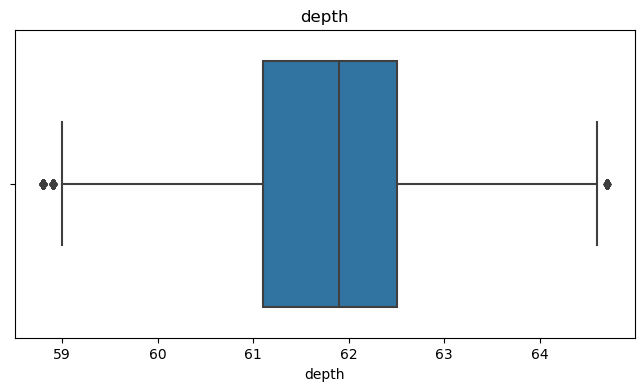

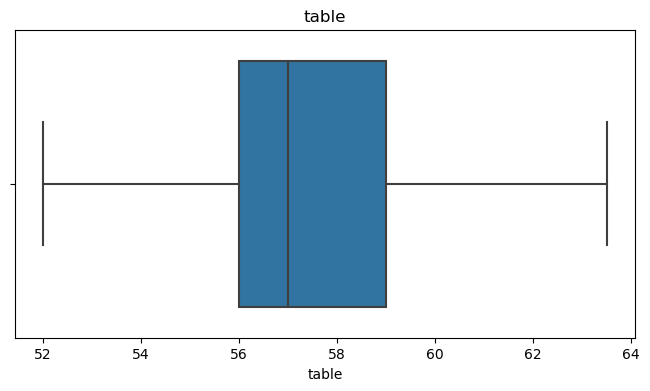

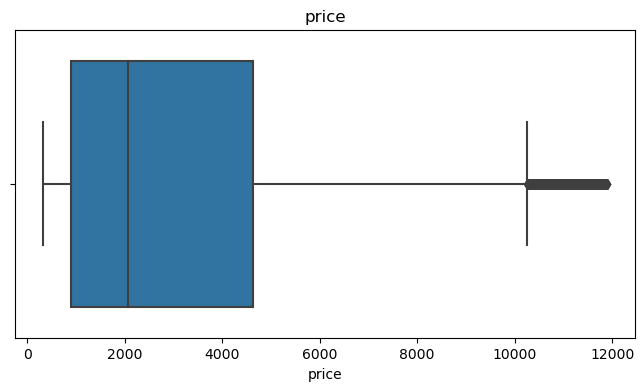

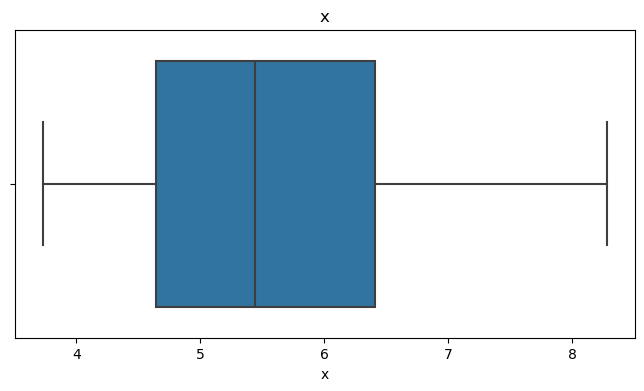

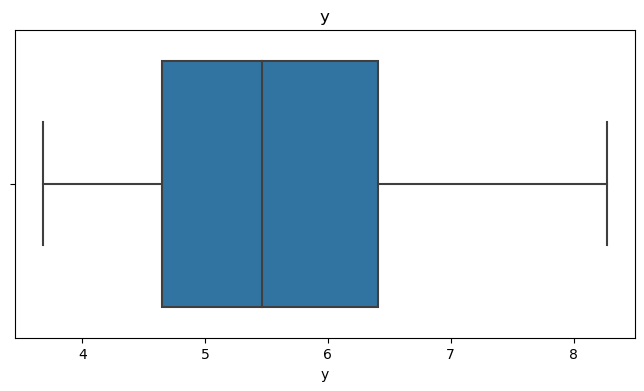

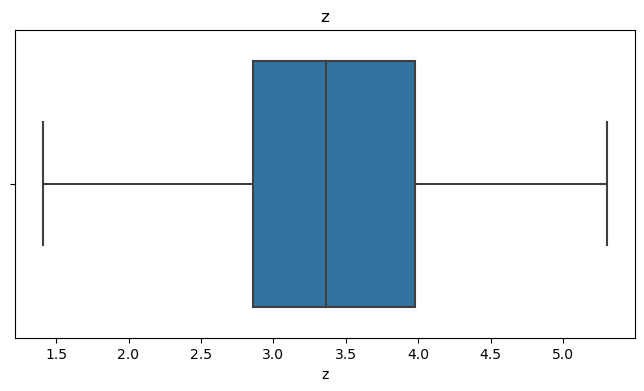

In [24]:
for col in df_no_outliers.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.show()

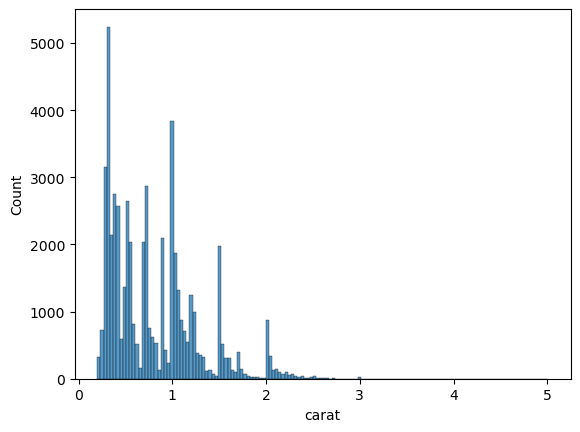

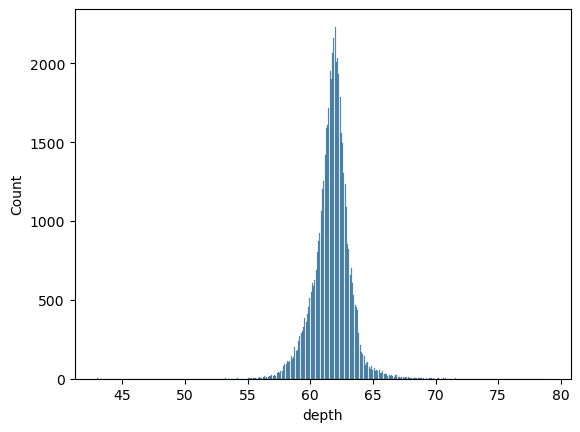

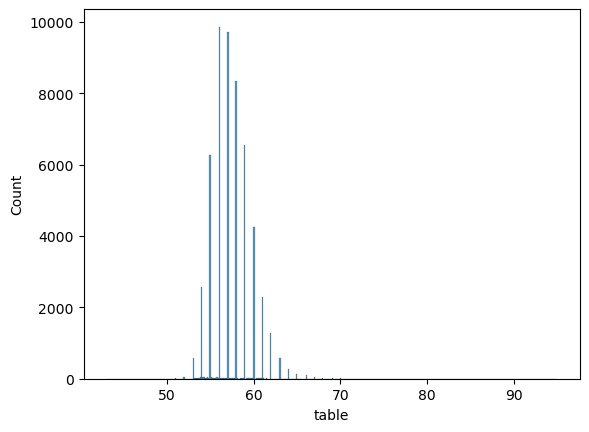

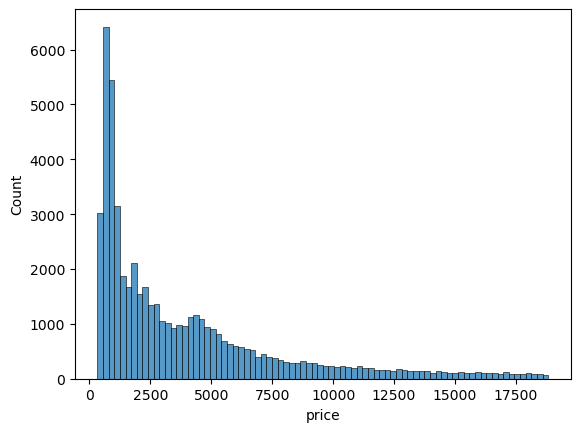

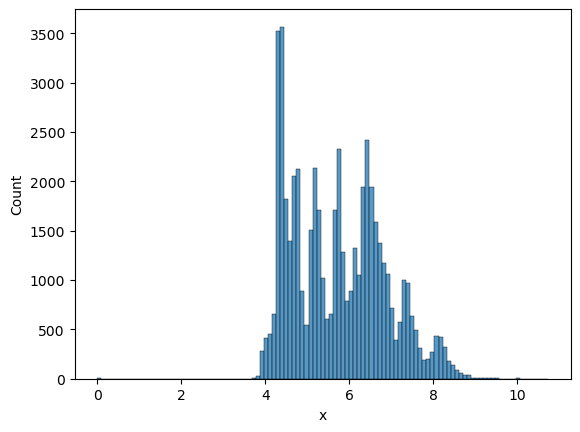

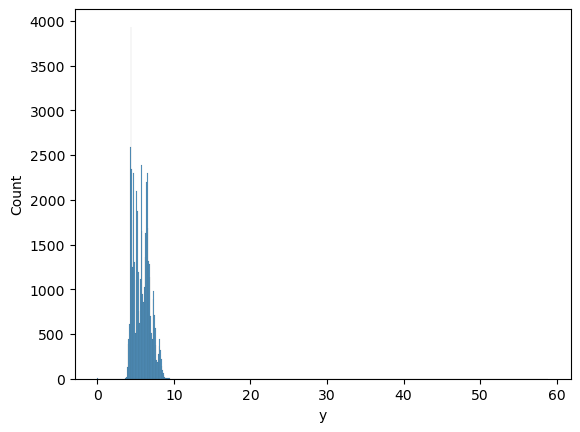

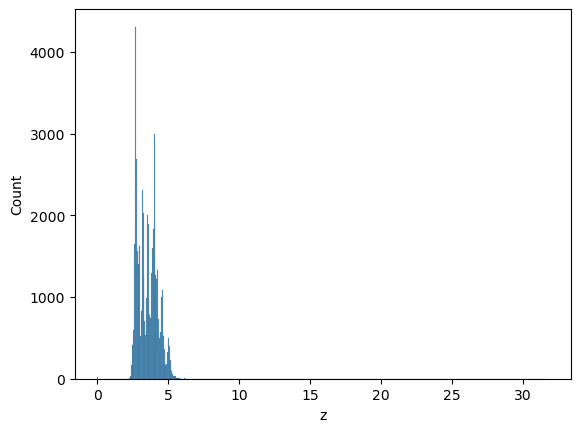

In [25]:
for i in df.select_dtypes(include=np.number).columns: #to check distribution
    sns.histplot(df[i])
    plt.show()

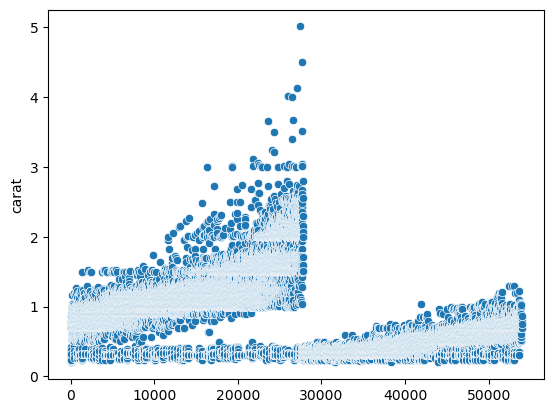

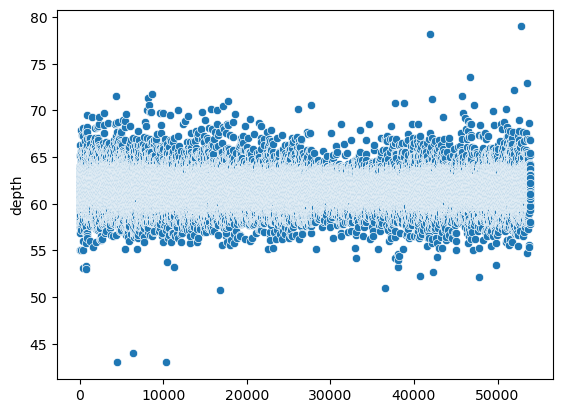

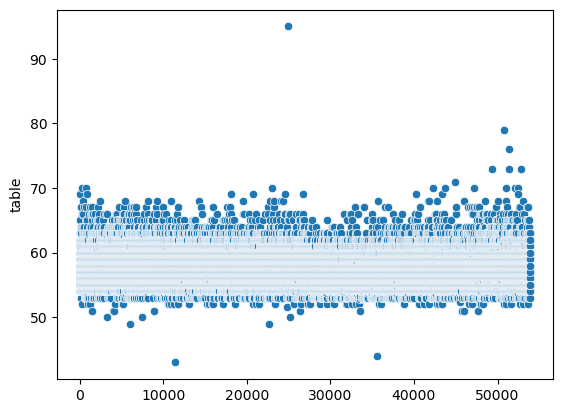

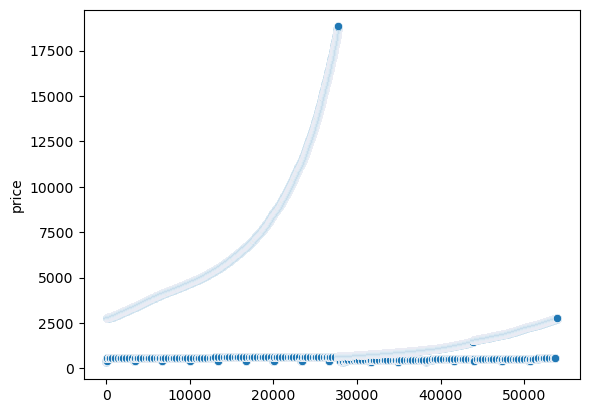

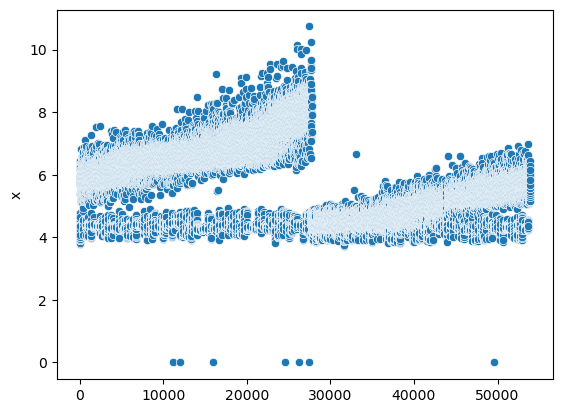

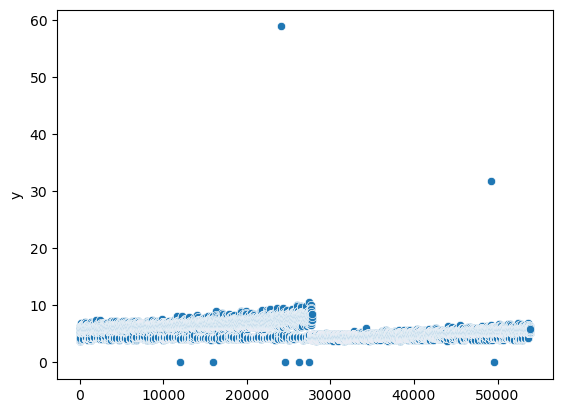

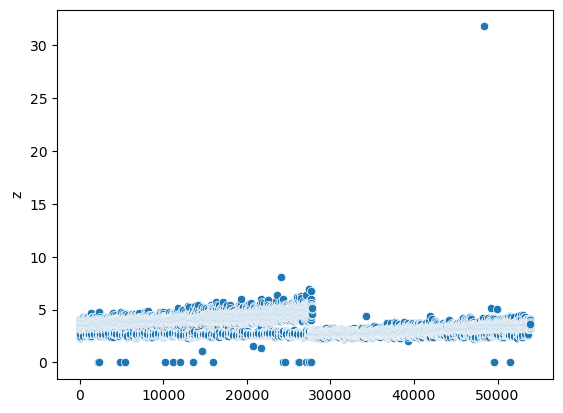

In [26]:
for i in df.select_dtypes(include=np.number).columns: # to check relationship
    sns.scatterplot(df[i])
    plt.show()

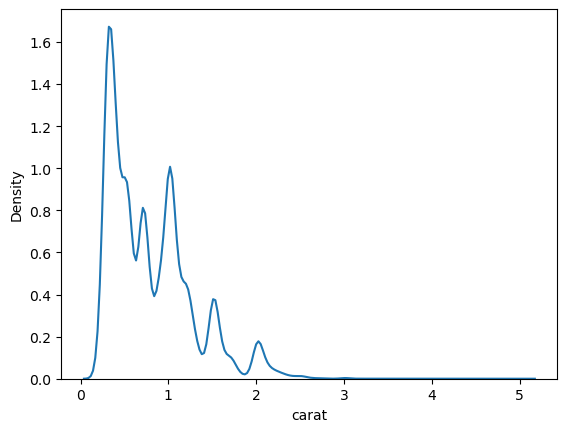

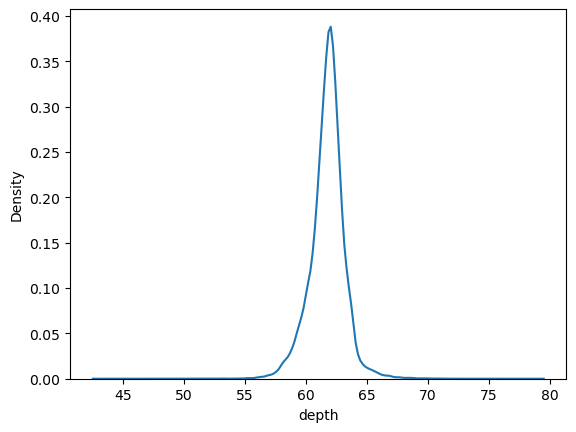

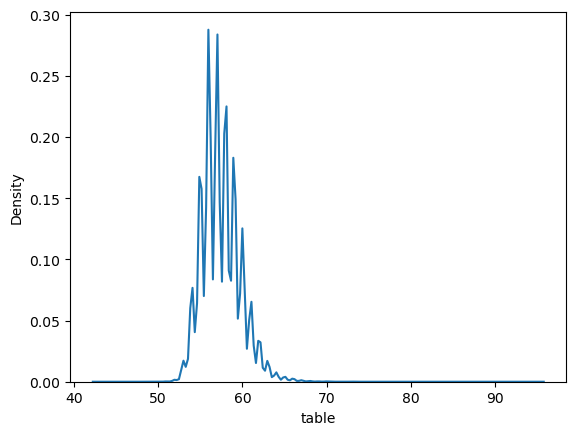

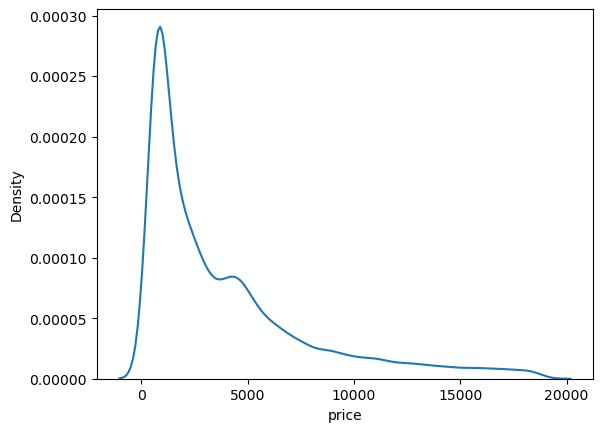

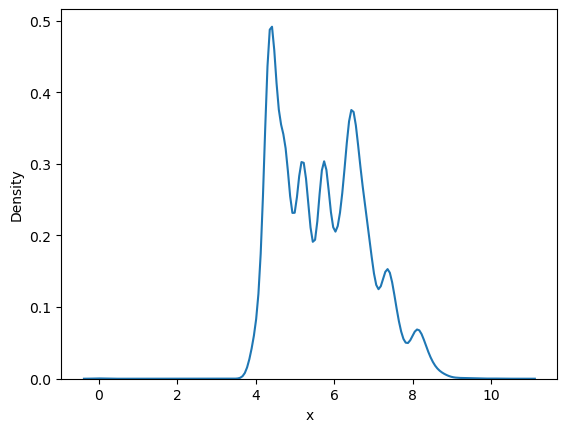

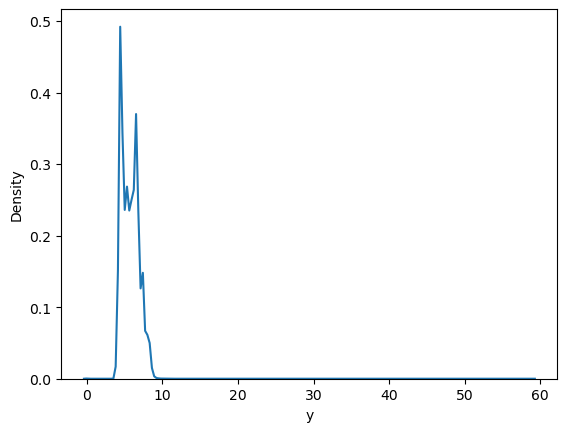

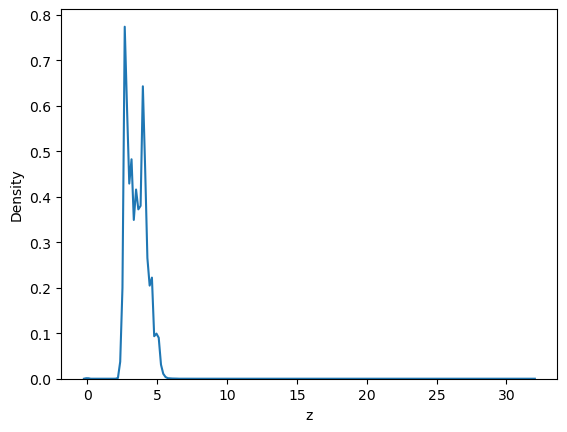

In [27]:
for i in df.select_dtypes(include=np.number).columns:
    sns.kdeplot(df[i])                                  # skewness
    plt.show()

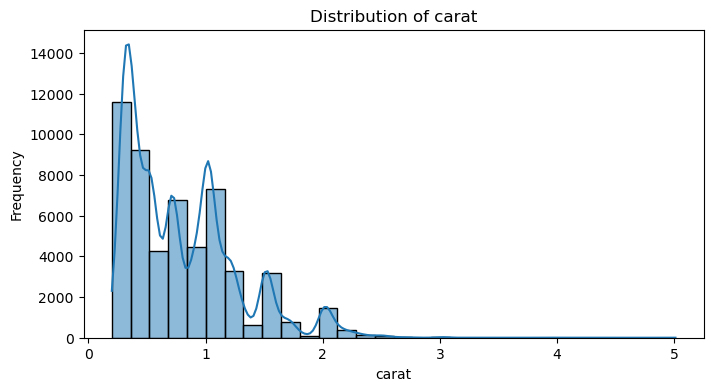

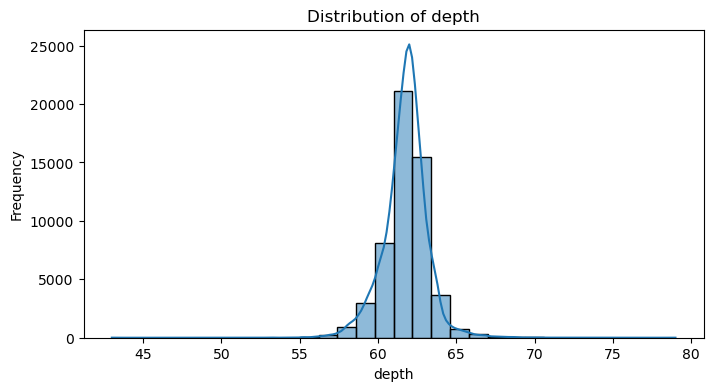

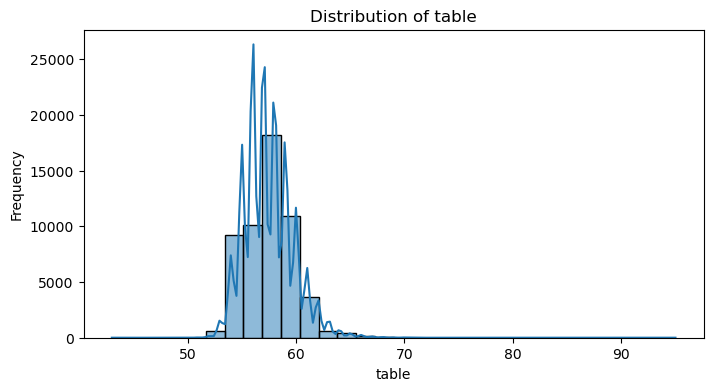

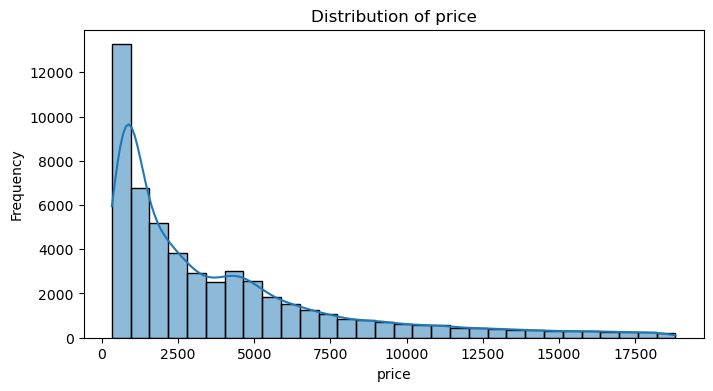

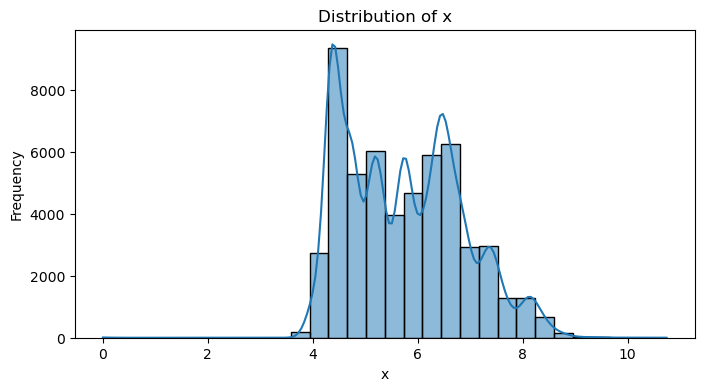

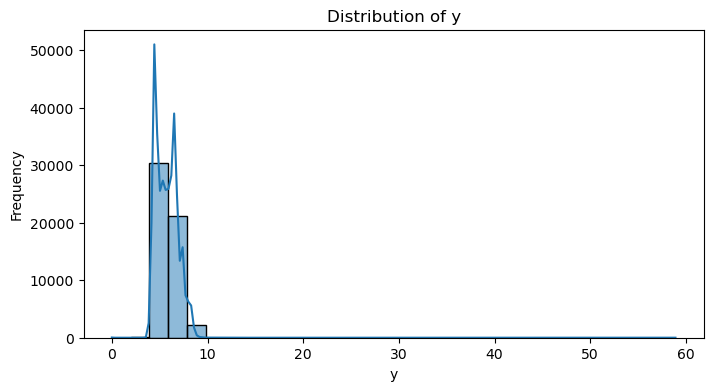

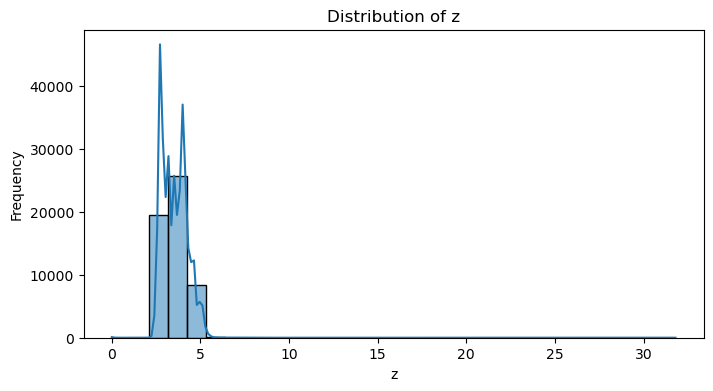

In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns  #identified the numerical columns

In [30]:
from  sklearn.preprocessing import StandardScalar # standard scalling

scalar = StandardScalar()

#scaling

scaled_data = scalar.fit_transform(df[numeric_columns])

# Replace the original numeric columns with scaled data

df[numeric_columns]=scaled_df
print(df[numeric_columns])

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\sonaw\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [31]:
from sklearn.preprocessing import StandardScaler  # Correct spelling of StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Scaling the numeric columns
scaled_data = scaler.fit_transform(df[numeric_columns])

# Replace the original numeric columns with scaled data
df[numeric_columns] = scaled_data

# Print the scaled numeric columns
print(df[numeric_columns])

          carat     depth     table     price         x         y         z
0     -1.199402 -0.173495 -1.100486 -0.904462 -1.589399 -1.537553 -1.572574
1     -1.241651 -1.362393  1.585691 -0.904462 -1.642938 -1.660231 -1.742780
2     -1.199402 -3.390512  3.376475 -0.904211 -1.500168 -1.458689 -1.742780
3     -1.072656  0.455922  0.242603 -0.902456 -1.366321 -1.318485 -1.288899
4     -1.030407  1.085338  0.242603 -0.902205 -1.241397 -1.213332 -1.118694
...         ...       ...       ...       ...       ...       ...       ...
53935 -0.164306 -0.663041 -0.205093 -0.294895  0.016763  0.022211 -0.054911
53936 -0.164306  0.945468 -1.100486 -0.294895 -0.036776  0.013448  0.101111
53937 -0.206555  0.735662  1.137995 -0.294895 -0.063546 -0.047891  0.030192
53938  0.131436 -0.523171  0.242603 -0.294895  0.373687  0.337668  0.285500
53939 -0.100933  0.316051 -1.100486 -0.294895  0.088148  0.118600  0.143662

[53794 rows x 7 columns]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  float64 
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.4 MB


In [33]:
df.drop(['color', 'clarity','cut'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53794 non-null  float64
 1   depth   53794 non-null  float64
 2   table   53794 non-null  float64
 3   price   53794 non-null  float64
 4   x       53794 non-null  float64
 5   y       53794 non-null  float64
 6   z       53794 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [35]:
from sklearn.model_selection import train_test_split

x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("Train set:",x_train.shape,y_train.shape)
print("Train set:",x_test.shape,y_test.shape)

Train set: (43035, 6) (43035,)
Train set: (10759, 6) (10759,)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df.drop(columns=['price'], axis=1)  
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test, y_pred))

MAE: 0.22032170596489473
MSE: 0.13565614264289058
R2 Score: 0.858445832210204
